In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importo as ferramentas para analise.

In [2]:
infantil = 0
primario = 0
transpF = 0
transpP = 0
transfT = 0
cidade = 0
codigo_cid = []
estado_list = []
cidades_list = []
creche_list = []
infantil_list = []
primario_list = []
transpCrec_list = []
transpF_list = []
transpP_list = []
transpTT_list = []
nao_achados = 0
nao_achados_list = []
porc_creche = []
porc_infantil=[]

Inicializando as variaveis e os arrays para manipulação dos dados.

In [3]:
wrt2016 = open(
    r"C:\\Users\\André\\CursoPyLadiesSP-master\\TRABALHO\\Educacao-Infantil_X_Enade\\escola_2016.txt")

saeb2017 = open(
    r"C:\\Users\\André\\CursoPyLadiesSP-master\\TRABALHO\\Educacao-Infantil_X_Enade\\saeb-2017.csv")

Lendo os arquivos que contém os dados já tratados e separado para manipulação, escola_2016 que contem os dados das 
matriculas dos alunos já separados por idade, e saeb-2017 que contem as medias da prova aplicada em 2017.

In [4]:
for campos in wrt2016:
    campos = campos.split(";")
    codigo_cid.append(campos[0])
    cidades_list.append(campos[1])
    estado_list.append((campos[2]))
    creche_list.append(int(campos[3]))
    infantil_list.append(int(campos[4]))
    primario_list.append(int(campos[5]))
    porc_creche.append(100 if int(campos[3])/int(campos[5])*100 > 100 else int(campos[3])/int(campos[5])*100)
    porc_infantil.append(100 if int(
        campos[4])/int(campos[5])*100 > 100 else int(campos[4])/int(campos[5])*100)
    transpCrec_list.append(int(campos[6]))
    transpF_list.append(int(campos[7]))
    transpP_list.append(int(campos[8]))
    transpTT_list.append(int(campos[9][:-1]))
wrt2016.close()

Agora carregaremos os dados das escolas para manipulação nos arrays criados anteriormente.

In [5]:
escola_qtd = [0] * len(codigo_cid)
pes_port = [0] * len(codigo_cid)
pro_port = [0] * len(codigo_cid)
pro_port_saeb = [0] * len(codigo_cid)
pes_mat = [0] * len(codigo_cid)
pro_mat = [0] * len(codigo_cid)
pro_mat_saeb = [0] * len(codigo_cid)
escola_qtd = [0] * len(codigo_cid)
qtd_alunos = [0] * len(codigo_cid)
creche = [0] * len(codigo_cid)
primario = [0] * len(codigo_cid)
preescola = [0] * len(codigo_cid)

Como os dados serão contabilizados por cidade, os arrays serão iniciarão com tamanho da lista de cidades.

In [6]:
def flutuante(x):
    if (x == ''):
        return 0
    else:
        return float(x)

Função criada para evitar erros na hora de icrementar as listas.

In [7]:
for notas in saeb2017:
    notas = notas.split(";")
    if notas[0] in codigo_cid:
        qtd_alunos[codigo_cid.index(notas[0])] += flutuante(notas[1])
        pro_port_saeb[codigo_cid.index(notas[0])] += flutuante(notas[2])
        pro_mat_saeb[codigo_cid.index(notas[0])] += flutuante(notas[3])
        creche[codigo_cid.index(notas[0])] += flutuante(notas[4])
        preescola[codigo_cid.index(notas[0])] += flutuante(notas[5])
        primario[codigo_cid.index(notas[0])] += flutuante(notas[6])
    else:
        nao_achados += 1
        nao_achados_list.append(notas[0])


saeb2017.close()

Contabilizando as medias por cidades e alunos por cidades.

In [8]:
dfF = pd.DataFrame({
    'Cidades': cidades_list,
    'UF': estado_list,
    'Creche': creche_list,
    'Infantil': infantil_list,
    'Primario': primario_list,
    'Matematica_Media': pro_mat_saeb,
    'Portugues_Media': pro_port_saeb,
    'Creche_X_Primario': porc_creche,
    'Infantil_X_Primario': porc_infantil
   
   
})

Criação do dataframe.

In [9]:
dfF.describe()

,Creche,Infantil,Primario,Matematica_Media,Portugues_Media,Creche_X_Primario,Infantil_X_Primario
count,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000,1668.000000
mean,309.202038,639.571942,724.434053,206.694808,205.456667,34.760834,87.804794
std,2806.426604,4285.875091,4772.828858,27.458671,26.404706,21.362761,12.895983
min,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,32.826748
25%,21.000000,68.000000,76.000000,191.955000,191.377500,19.577940,80.330894
50%,48.000000,135.500000,153.000000,207.500000,206.355000,34.220648,91.109990
75%,152.250000,366.250000,402.750000,222.082500,220.687500,48.239366,100.000000
max,104746.000000,150544.000000,165517.000000,295.190000,280.480000,100.000000,100.000000


Descrição do Dataframe

In [10]:
dfF.sort_values(by=['Creche_X_Primario'],ascending=False).head(15)

,Cidades,UF,Creche,Infantil,Primario,Matematica_Media,Portugues_Media,Creche_X_Primario,Infantil_X_Primario
1513,SANTANA DA PONTE PENSA,SP,11,15,6,178.39,170.62,100.0,100.000000
299,APERIBE,RJ,103,119,79,178.09,177.67,100.0,100.000000
726,IBITURUNA,MG,38,23,33,221.09,220.56,100.0,69.696970
1568,NOVAIS,SP,68,91,60,193.01,198.74,100.0,100.000000
1138,AGUAS DE SANTA BARBARA,SP,80,134,74,221.12,212.39,100.0,100.000000
620,MARILAC,MG,73,68,59,187.97,188.45,100.0,100.000000
1560,ALVARES FLORENCE,SP,42,50,40,224.59,212.15,100.0,100.000000
1540,BALBINOS,SP,18,32,16,204.44,201.07,100.0,100.000000
1625,PEDRINHAS PAULISTA,SP,34,37,29,222.21,214.40,100.0,100.000000
1528,BORACEIA,SP,63,78,59,261.44,257.23,100.0,100.000000


As 15 cidades com mais matriculas em creche.

In [13]:
dfF.query('Matematica_Media > 100 & Primario > 5000').head(40).sort_values(by=['Creche_X_Primario'],ascending=False)

,Cidades,UF,Creche,Infantil,Primario,Matematica_Media,Portugues_Media,Creche_X_Primario,Infantil_X_Primario
910,PIRACICABA,SP,3909,4739,5485,204.93,205.17,71.267092,86.399271
351,TAUBATE,SP,3658,5500,5681,222.06,222.78,64.390072,96.813941
288,SAO PAULO,SP,104746,150544,165517,169.47,171.89,63.284134,90.953799
335,SAO JOSE DO RIO PRETO,SP,3440,5238,5536,209.73,212.21,62.138728,94.617052
911,RIBEIRAO PRETO,SP,4758,7730,8112,199.93,202.19,58.653846,95.290927
352,SANTOS,SP,3650,4719,6225,194.41,197.37,58.634538,75.807229
774,CAMPINAS,SP,8235,13121,14529,190.11,192.93,56.679744,90.309037
326,SOROCABA,SP,4864,8417,8619,196.14,198.90,56.433461,97.656341
770,SANTO ANDRE,SP,4989,8349,9353,193.77,197.55,53.341174,89.265476
347,PRAIA GRANDE,SP,2643,4346,5081,193.41,195.75,52.017319,85.534344


Desempenho das maiores cidades da região sudeste.

In [14]:
dfF['Matematica_Media'].mean()

206.69480815347723

Media de proeficiencia em matematica na Região Sudeste

In [15]:
dfF['Portugues_Media'].mean()

205.45666666666665

Media de proeficiencia em português na Região Sudeste

In [16]:
dfF.query('Creche_X_Primario <25 & Primario > 1000').mean()

Creche                  569.611111
Infantil               2976.833333
Primario               3695.777778
Matematica_Media        187.730000
Portugues_Media         189.329167
Creche_X_Primario        16.491856
Infantil_X_Primario      82.280443
dtype: float64

Medias das cidades que investem menos de 25% em creche.

In [17]:
dfF.query('Creche_X_Primario > 25 & Creche_X_Primario < 50  & Primario > 1000').mean()

Creche                 1659.175926
Infantil               3530.898148
Primario               4059.787037
Matematica_Media        201.821481
Portugues_Media         202.608333
Creche_X_Primario        38.154169
Infantil_X_Primario      87.587755
dtype: float64

Medias das cidades que investem entre de 25% e 50% em creche.

In [18]:
dfF.query('Creche_X_Primario > 50 & Creche_X_Primario < 75 & Primario > 1000').mean()

Creche                 3778.538462
Infantil               5641.576923
Primario               6180.903846
Matematica_Media        203.053654
Portugues_Media         203.954423
Creche_X_Primario        59.146183
Infantil_X_Primario      91.995639
dtype: float64

Medias das cidades que investem entre de 50% e 75% em creche.

In [19]:
dfF.query('Creche_X_Primario > 75 & Primario > 1000').mean()

Creche                 2262.000000
Infantil               2706.500000
Primario               2699.500000
Matematica_Media        196.860000
Portugues_Media         195.000000
Creche_X_Primario        83.356181
Infantil_X_Primario      99.111977
dtype: float64

Medias das cidades que investem acima de 75% em creche.

In [22]:
dfF.sort_values(['Matematica_Media','Portugues_Media'],ascending=False).groupby(['Cidades','UF']).head(5)

,Cidades,UF,Creche,Infantil,Primario,Matematica_Media,Portugues_Media,Creche_X_Primario,Infantil_X_Primario
1526,GUARANI DÂ´OESTE,SP,16,27,21,295.19,265.13,76.190476,100.000000
1509,ASPASIA,SP,19,32,19,294.32,268.07,100.000000,100.000000
1495,SANTA SALETE,SP,17,34,23,283.14,278.47,73.913043,100.000000
477,ARAPUA,MG,15,35,56,282.93,270.28,26.785714,62.500000
1016,SERRA DA SAUDADE,MG,7,12,17,282.66,280.48,41.176471,70.588235
...,...,...,...,...,...,...,...,...,...
483,TURIUBA,SP,18,32,23,0.00,0.00,78.260870,100.000000
645,SAO JOSE DO VALE DO RIO PRETO,RJ,16,219,271,0.00,0.00,5.904059,80.811808
786,SANTA RITA DO ITUETO,MG,18,80,90,0.00,0.00,20.000000,88.888889
1292,PEDRA DO ANTA,MG,0,42,44,0.00,0.00,0.000000,95.454545


Maiores medias em matematica e portugues.

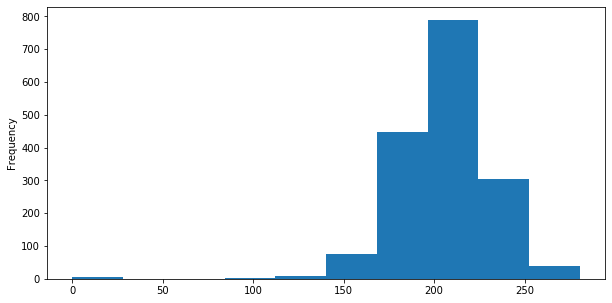

In [23]:
plt.figure(figsize = (10, 5)) 
dfF['Portugues_Media'].plot(kind ="hist") 

Grafico que ilustra os desempenhos de português em todas as cidades da região sudeste.
Cerca de:
790 cidades tiveram media de 190 a 220, 
470 cidades tiveram media de 140 a 190, 
290 cidades tiveram media de 220 a 251, 
80 cidades tiveram media de 140 a 170, 
30 cidades tiveram media de 251 a 275.

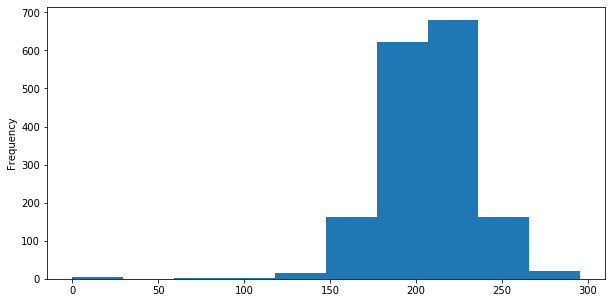

In [28]:
plt.figure(figsize = (10, 5)) 
dfF['Matematica_Media'].plot(kind ="hist") 

Grafico que ilustra os desempenhos de matematica em todas as cidades da região sudeste.
Cerca de:
690 cidades tiveram media de 210 a 230, 
610 cidades tiveram media de 170 a 210, 
180 cidades tiveram media de 145 a 170, 
180 cidades tiveram media de 235 a 265, 
20 cidades tiveram media de 265 a 295,
15 cidades tiveram media de 115 a 248.

<Figure size 720x360 with 0 Axes>

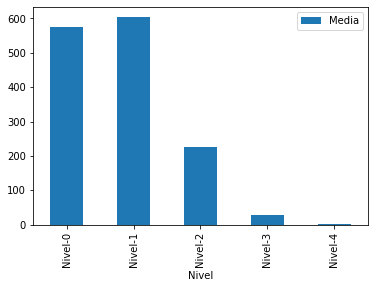

In [40]:
nv0,nv1,nv2,nv3,nv4 =[],[],[],[],[]

nv0 = dfF.query('Matematica_Media < 200 & Portugues_Media < 200').count()
nv1 = dfF.query('Matematica_Media >= 200 & Matematica_Media <= 225 & Portugues_Media >= 200 & Portugues_Media <= 225').count()
nv2 = dfF.query('Matematica_Media >= 225 & Matematica_Media <= 250 & Portugues_Media >= 225 & Portugues_Media <= 250').count()
nv3 = dfF.query('Matematica_Media >= 250 & Matematica_Media <= 275 & Portugues_Media >= 250 & Portugues_Media <= 275').count()
nv4 = dfF.query('Matematica_Media >= 275 & Matematica_Media <= 300 & Portugues_Media >= 275 & Portugues_Media <= 300').count()

dfP = pd.DataFrame({'Nivel':['Nivel-0','Nivel-1','Nivel-2','Nivel-3','Nivel-4'],
       'Media':[nv0['Cidades'],nv1['Cidades'],nv2['Cidades'],nv3['Cidades'],nv4['Cidades']]     
})
plt.figure(figsize = (10, 5)) 
dfP.plot(kind='bar',x='Nivel',y='Media')

Escala SAEB de proeficiencia de lingua portuguesa e matematica.


Nive-0: abaixo de 200, Nivel-1: maior ou igual a 200 e abaixo de 225, Nivel-2: maior ou igual a 225 e abaixo de 250, Nivel-3: maior ou igual a 250 e abaixo de 275, Nivel-4: Maior ou igual a 275 e abaixo de 300.

In [42]:
dfF.query('Cidades.str.contains("SAO PAULO") or Cidades.str.contains("RIO DE JANEIRO") or Cidades.str.contains("BELO HORIZONTE") or Cidades.str.contains("VITORIA") & Primario > 1000').sort_values(by=['Creche_X_Primario'],ascending=False)

,Cidades,UF,Creche,Infantil,Primario,Matematica_Media,Portugues_Media,Creche_X_Primario,Infantil_X_Primario
0,VITORIA,ES,4061,4453,4617,183.43,180.37,87.957548,96.447910
288,SAO PAULO,SP,104746,150544,165517,169.47,171.89,63.284134,90.953799
162,RIO DE JANEIRO,RJ,38497,71779,80887,216.36,215.87,47.593556,88.739847
26,BELO HORIZONTE,MG,13339,27222,36411,207.11,205.85,36.634534,74.763121


Desempenho das capitais da Região Sudeste:

In [43]:
dfF.query('Cidades.str.contains("SAO JOSE DOS CAMPOS") or Cidades.str.contains("JACAREI") or Cidades.str.contains("TAUBATE") or Cidades.str.contains("CACAPAVA")').sort_values(by=['Creche_X_Primario'],ascending=False)

,Cidades,UF,Creche,Infantil,Primario,Matematica_Media,Portugues_Media,Creche_X_Primario,Infantil_X_Primario
351,TAUBATE,SP,3658,5500,5681,222.06,222.78,64.390072,96.813941
324,SAO JOSE DOS CAMPOS,SP,4558,9521,9366,206.40,205.19,48.665385,100.000000
829,JACAREI,SP,1324,3062,3286,195.11,194.56,40.292149,93.183201
823,CACAPAVA,SP,314,1225,1359,177.32,180.79,23.105224,90.139809


Desempenho das cidades da região: